In [18]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False


In [19]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled= train_input/255.0

In [20]:
train_scaled,val_scaled,train_target,val_target=train_test_split(
train_scaled,train_target,test_size=0.2, random_state=42)

In [21]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))   #sigmoid
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))


c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마 loss,accuracy 값을 저장
# train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7267 - loss: 0.7749 - val_accuracy: 0.8496 - val_loss: 0.4208
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8397 - loss: 0.4470 - val_accuracy: 0.8600 - val_loss: 0.3836
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8538 - loss: 0.4078 - val_accuracy: 0.8567 - val_loss: 0.3862
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8591 - loss: 0.3840 - val_accuracy: 0.8732 - val_loss: 0.3588
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8654 - loss: 0.3655 - val_accuracy: 0.8706 - val_loss: 0.3532
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8704 - loss: 0.3570 - val_accuracy: 0.8727 - val_loss: 0.3412
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.3484 - val_accuracy: 0.8787 - val_loss: 0.3340
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8749 - loss: 0.3409 - 

Text(0, 0.5, 'loss')

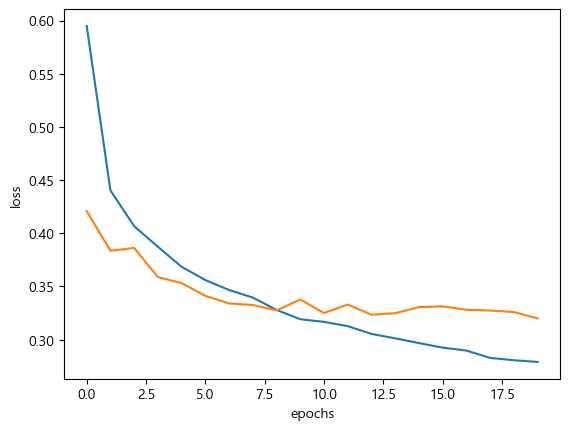

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

callback

In [25]:
# 손실률이 가장 낮은 위치의 모델을 저장시켜줌.
# 확장자 h5, keras 확장자명 변경
#epochs를 20번 돌때 가장좋은 모델을 저장시켜줌.
check_point_cb=keras.callbacks.ModelCheckpoint('best_model.keras')
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[check_point_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8955 - loss: 0.2755 - val_accuracy: 0.8853 - val_loss: 0.3260
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8999 - loss: 0.2639 - val_accuracy: 0.8881 - val_loss: 0.3255
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2697 - val_accuracy: 0.8875 - val_loss: 0.3310
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9005 - loss: 0.2605 - val_accuracy: 0.8820 - val_loss: 0.3455
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8974 - loss: 0.2684 - val_accuracy: 0.8897 - val_loss: 0.3283
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9000 - loss: 0.2664 - val_accuracy: 0.8873 - val_loss: 0.3412
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9021 - loss: 0.2561 - val_accuracy: 0.8856 - val_loss: 0.3485
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9016 - loss: 0.2589 - 

In [26]:
model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled,val_target)

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.adam.Adam object at 0x0000029B03A46B70>:

'Unable to synchronously open object (bad object header version number)'

List of objects that could not be loaded:
[<keras.src.optimizers.adam.Adam object at 0x0000029B03A46B70>]

#조기종료

In [28]:
checkpoint_cd = keras.callbacks.ModelCheckpoint('best_model.keras')
#compile 종료
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#조기종료
# patience=2 손실값이 2이면 종료해줘라
# restore_best_weights=True 뒤로 빽 해서 가장 좋은 모델을 저장시켜줌
early_stoping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cd,early_stoping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9193 - loss: 0.2085 - val_accuracy: 0.8890 - val_loss: 0.3792
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9231 - loss: 0.2009 - val_accuracy: 0.8881 - val_loss: 0.3785
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9214 - loss: 0.2015 - val_accuracy: 0.8898 - val_loss: 0.3825
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9219 - loss: 0.1996 - val_accuracy: 0.8923 - val_loss: 0.3793
